In [1]:
import urllib
import pyodbc
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cấu hình thông tin kết nối tới SQL Server
server = 'CHANG\MYSQL'  # Địa chỉ SQL Server của bạn
database = 'DiemThi'  # Tên cơ sở dữ liệu
username = 'sa'  # Tên đăng nhập
password = '001140'  # Mật khẩu
driver = '{ODBC Driver 17 for SQL Server}'

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ACER\AppData\Local\Temp\ipykernel_3784\3544371126.py:2: SyntaxWarning: invalid escape sequence '\M'
  server = 'CHANG\MYSQL'  # Địa chỉ SQL Server của bạn


In [3]:
# Tạo kết nối tới SQL Server
conn = pyodbc.connect(f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}')
cursor = conn.cursor()

In [4]:
# Gán dữ liệu vào DataFrame từ các bảng
df_ThiSinh = pd.read_sql("SELECT * FROM ThiSinh", conn)
df_DiemThi = pd.read_sql("SELECT * FROM DiemThi", conn)
df_MonThi = pd.read_sql("SELECT * FROM MonThi", conn)
df_KhoiMonThi = pd.read_sql("SELECT * FROM KhoiMonThi", conn)


# Hiển thị dữ liệu
print(df_ThiSinh.head(), "\n")
print(df_DiemThi.head(), "\n")
print(df_MonThi.head(), "\n")
print(df_KhoiMonThi.head(), "\n")

C:\Users\ACER\AppData\Local\Temp\ipykernel_3784\4105109382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ThiSinh = pd.read_sql("SELECT * FROM ThiSinh", conn)
C:\Users\ACER\AppData\Local\Temp\ipykernel_3784\4105109382.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_DiemThi = pd.read_sql("SELECT * FROM DiemThi", conn)


      MaSBD   KhuVuc
0  04000001  Da Nang
1  04000002  Da Nang
2  04000003  Da Nang
3  04000004  Da Nang
4  04000005  Da Nang 

      MaSBD     MaMon  Diem
0  04000001     DiaLy  8.50
1  04000001      GDCD  8.50
2  04000001    HoaHoc   NaN
3  04000001    LichSu  5.75
4  04000001  NgoaiNgu  2.40 

      MaMon             TenMon
0     DiaLy             Dia ly
1      GDCD  Giao duc cong dan
2    HoaHoc            Hoa hoc
3    LichSu            Lich su
4  NgoaiNgu          Ngoai ngu 

   MaKhoi     MaMon
0   KhoiA    HoaHoc
1   KhoiA      Toan
2   KhoiA     VatLy
3  KhoiA1  NgoaiNgu
4  KhoiA1      Toan 



C:\Users\ACER\AppData\Local\Temp\ipykernel_3784\4105109382.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_MonThi = pd.read_sql("SELECT * FROM MonThi", conn)
C:\Users\ACER\AppData\Local\Temp\ipykernel_3784\4105109382.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_KhoiMonThi = pd.read_sql("SELECT * FROM KhoiMonThi", conn)


In [5]:
df_all = (
    df_ThiSinh
    .merge(df_DiemThi, on="MaSBD", how="left")
    .merge(df_MonThi, on="MaMon", how="left")
    .merge(df_KhoiMonThi, on="MaMon", how="left")
)

# Kết quả
print(df_all)

            MaSBD      KhuVuc   MaMon  Diem             TenMon  MaKhoi
0        04000001     Da Nang   DiaLy  8.50             Dia ly   KhoiC
1        04000001     Da Nang    GDCD  8.50  Giao duc cong dan     NaN
2        04000001     Da Nang  HoaHoc   NaN            Hoa hoc   KhoiA
3        04000001     Da Nang  HoaHoc   NaN            Hoa hoc   KhoiB
4        04000001     Da Nang  LichSu  5.75            Lich su   KhoiC
...           ...         ...     ...   ...                ...     ...
3637499  47012728  Binh Thuan    Toan  7.00               Toan   KhoiD
3637500  47012728  Binh Thuan     Van  5.75                Van   KhoiC
3637501  47012728  Binh Thuan     Van  5.75                Van   KhoiD
3637502  47012728  Binh Thuan   VatLy   NaN             Vat ly   KhoiA
3637503  47012728  Binh Thuan   VatLy   NaN             Vat ly  KhoiA1

[3637504 rows x 6 columns]


In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637504 entries, 0 to 3637503
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   MaSBD   object 
 1   KhuVuc  object 
 2   MaMon   object 
 3   Diem    float64
 4   TenMon  object 
 5   MaKhoi  object 
dtypes: float64(1), object(5)
memory usage: 166.5+ MB


In [7]:
# Đổi MaSBD từ chuỗi sang số nguyên
df_all["MaSBD"] = df_all["MaSBD"].astype(int)

# Kiểm tra lại kiểu dữ liệu
print(df_all.dtypes)

MaSBD       int64
KhuVuc     object
MaMon      object
Diem      float64
TenMon     object
MaKhoi     object
dtype: object


C:\Users\ACER\AppData\Local\Temp\ipykernel_3784\695439277.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = SoLuong_TS.index, y = SoLuong_TS.values, palette="viridis")


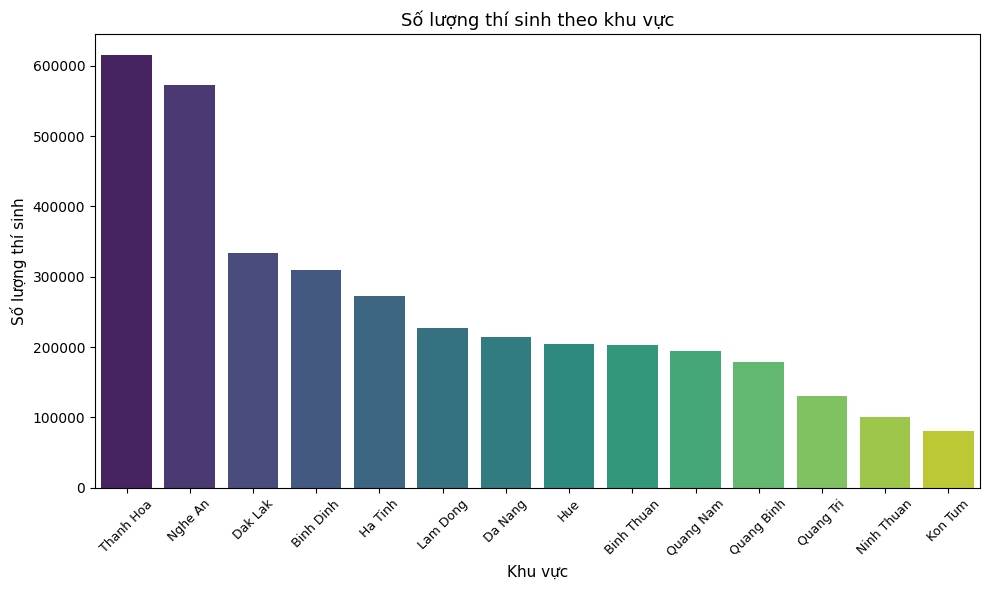

In [8]:
# Đếm số lượng thí sinh theo từng khu vực
SoLuong_TS = df_all["KhuVuc"].value_counts().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x = SoLuong_TS.index, y = SoLuong_TS.values, palette="viridis")
plt.title("Số lượng thí sinh theo khu vực", fontsize = 13)
plt.xlabel("Khu vực", fontsize = 11)
plt.ylabel("Số lượng thí sinh", fontsize = 11)
plt.xticks(rotation = 45, fontsize = 9)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

MaMon    DiaLy  GDCD  HoaHoc  LichSu  NgoaiNgu  SinhHoc  Toan   Van  VatLy
MaSBD                                                                     
4000001   8.50  8.50     NaN    5.75       2.4      NaN   5.6  6.25    NaN
4000002    NaN   NaN    4.25     NaN       6.6     5.50   8.0  6.00   8.25
4000003   6.25  8.25     NaN    5.00       5.0      NaN   4.4  6.50    NaN
4000004    NaN   NaN    7.50     NaN       6.8     5.50   7.4  6.25   7.00
4000005    NaN   NaN    6.00     NaN       7.8     3.75   8.6  7.25   8.50


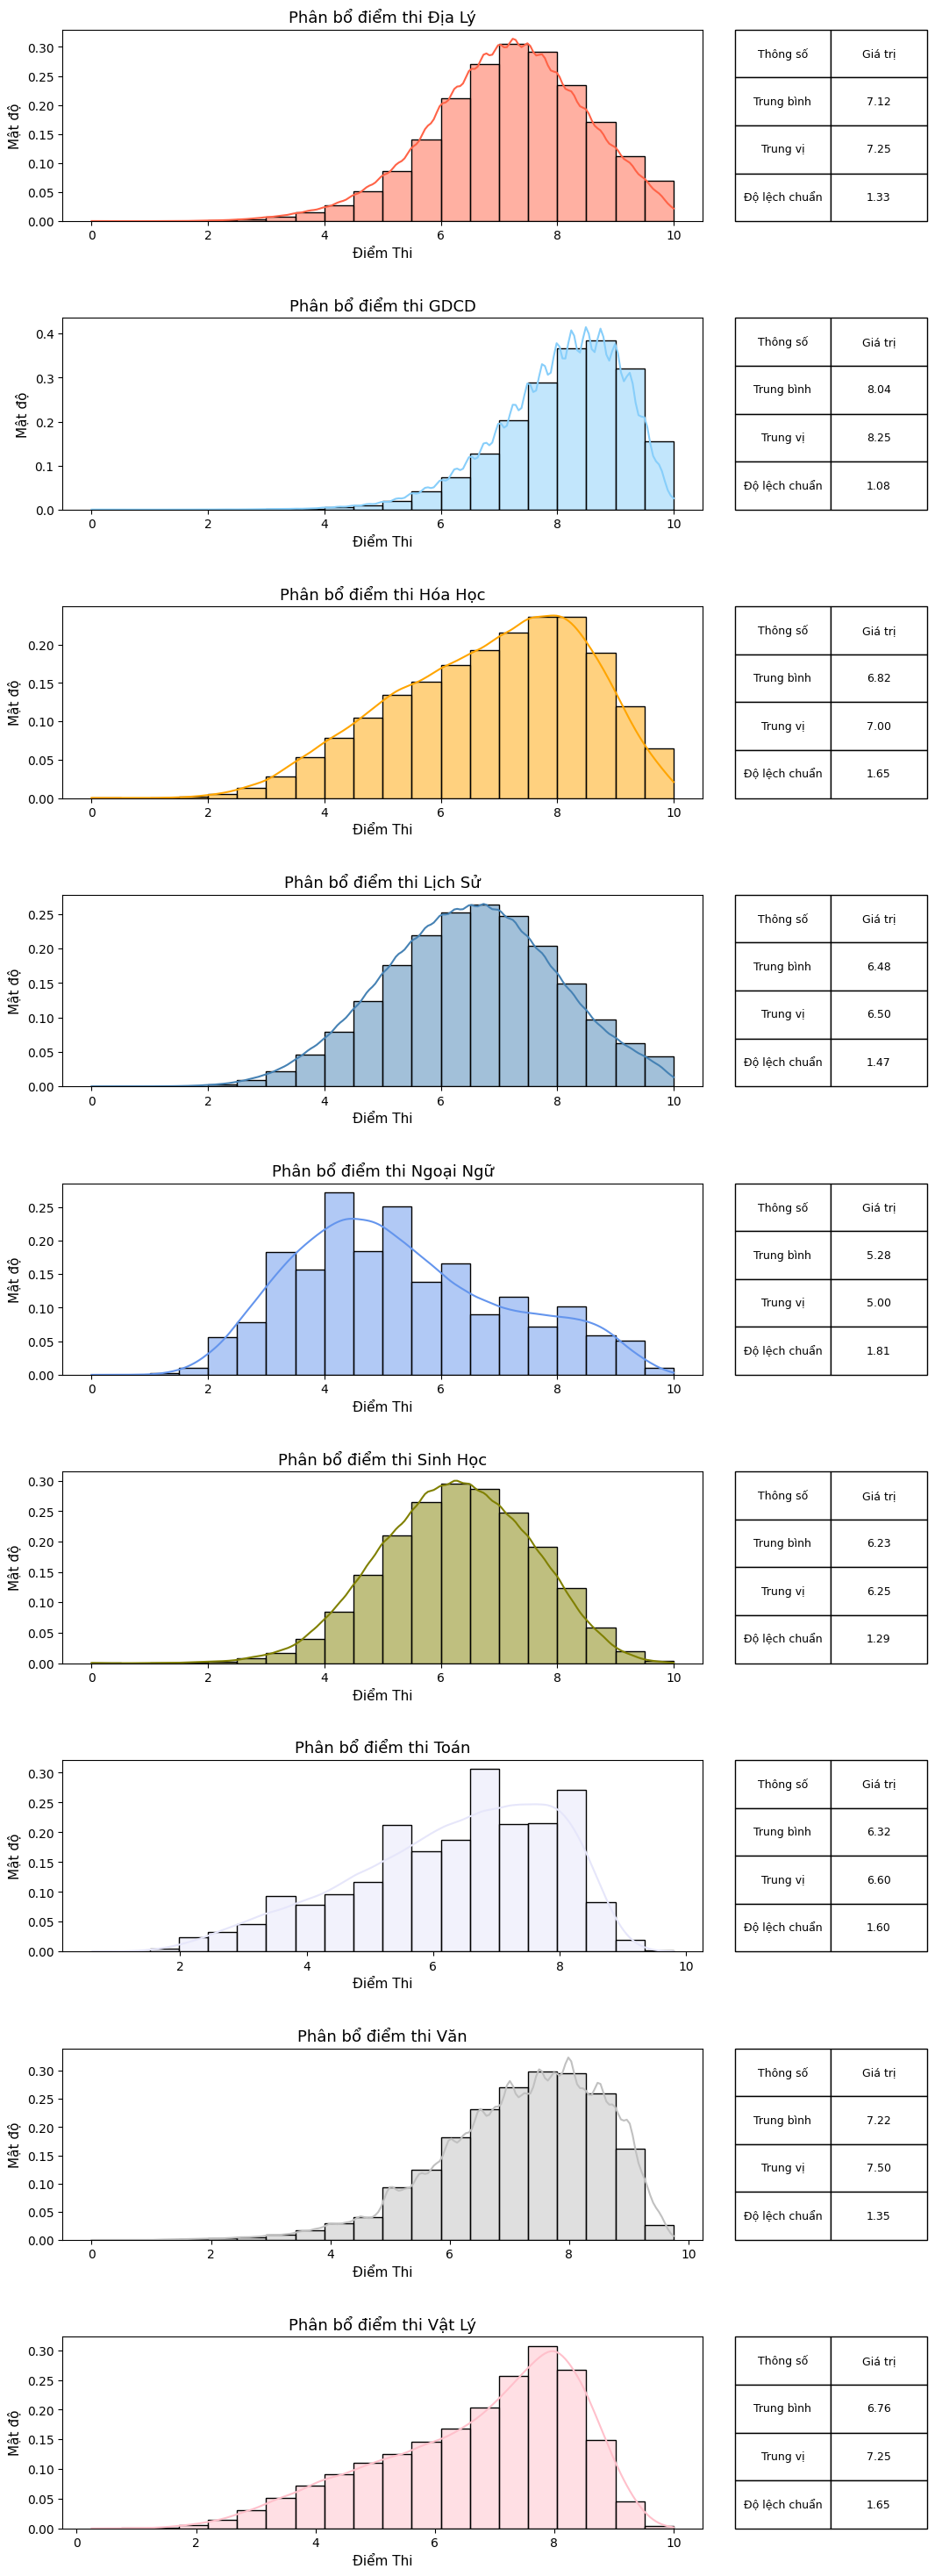

In [9]:
df_pivot = df_all.pivot_table(index="MaSBD", columns="MaMon", values="Diem", aggfunc="first")
print(df_pivot.head())

tiltes = ["Địa Lý", "GDCD", "Hóa Học", "Lịch Sử", "Ngoại Ngữ",   
          "Sinh Học", "Toán", "Văn", "Vật Lý"]

colors = ["tomato", "lightskyblue", "orange", "steelblue", "cornflowerblue", 
          "olive", "lavender", "silver", "pink"]

MonThi = df_pivot.columns

# Vẽ histogram để thể hiện phân bổ điểm thi
plt.figure(figsize=(12, 30))
for i, (mon, color) in enumerate(zip(MonThi, colors), 1):
    plt.subplot(len(MonThi), 1, i)
    sns.histplot(df_pivot[mon], bins=20, kde=True, color=color, stat="density")

    # Tính các thông số thống kê
    mean    = df_pivot[mon].mean()
    median  = df_pivot[mon].median()
    std     = df_pivot[mon].std()

    # Tiêu đề cho nhãn và các trục
    plt.title(f"Phân bổ điểm thi {tiltes[i-1]}", fontsize = 13)
    plt.xlabel("Điểm Thi", fontsize = 11)
    plt.ylabel("Mật độ", fontsize = 11)

    # Hiển thị các thông tin thống kê trên biểu đồ
    texts = [["Trung bình", f"{mean:.2f}"],
             ["Trung vị", f"{median:.2f}"],
             ["Độ lệch chuẩn", f"{std:.2f}"]]
    plt.table(cellText=texts, colLabels=["Thông số", "Giá trị"], loc="right", cellLoc="center", bbox=[1.05, 0, 0.3, 1])

plt.tight_layout(pad=3.0)
plt.show()

In [10]:
import pandas as pd

# Giả sử df_all là DataFrame chứa dữ liệu ban đầu

# Pivot dữ liệu để mỗi môn trở thành 1 cột
df_mon = df_all.pivot_table(index="MaSBD", columns="MaMon", values="Diem", aggfunc="first")

# Đặt lại tên cột để dễ hiểu
df_mon.columns.name = None  # Bỏ tên cột nhóm
df_mon.reset_index(inplace=True)

# Lọc các môn theo khối
khoi_mon = {
    "KhoiA": ["Toan", "VatLy", "HoaHoc"],
    "KhoiA1": ["Toan", "VatLy", "NgoaiNgu"],
    "KhoiB": ["Toan", "HoaHoc", "SinhHoc"],
    "KhoiC": ["Van", "LichSu", "DiaLy"],
    "KhoiD": ["Toan", "Van", "NgoaiNgu"]
}

# Tính tổng điểm cho mỗi khối theo MaSBD
for khoi, mons in khoi_mon.items():
    # Kiểm tra xem có đủ 3 môn trong khối không (không thiếu môn nào)
    if all(mon in df_mon.columns for mon in mons):
        # Kiểm tra xem các môn có điểm đầy đủ không (không có NaN)
        df_mon[khoi] = df_mon[mons].apply(lambda row: row.sum() if row.isna().sum() == 0 else pd.NA, axis=1)
    else:
        # Nếu thiếu môn, gán NaN cho khối đó
        df_mon[khoi] = pd.NA

# Tạo DataFrame df_khoi với MaSBD và các khối
df_khoi = df_mon[['MaSBD'] + list(khoi_mon.keys())]

# In kết quả
print(df_khoi)

           MaSBD KhoiA KhoiA1  KhoiB  KhoiC  KhoiD
0        4000001  <NA>   <NA>   <NA>   20.5  14.25
1        4000002  20.5  22.85  17.75   <NA>   20.6
2        4000003  <NA>   <NA>   <NA>  17.75   15.9
3        4000004  21.9   21.2   20.4   <NA>  20.45
4        4000005  23.1   24.9  18.35   <NA>  23.65
...          ...   ...    ...    ...    ...    ...
227339  47012724  <NA>   <NA>   <NA>  21.75   17.2
227340  47012725  <NA>   <NA>   <NA>   21.5   21.2
227341  47012726  <NA>   <NA>   <NA>   20.5   16.3
227342  47012727  <NA>   <NA>   <NA>   21.5  20.55
227343  47012728  <NA>   <NA>   <NA>  19.75  17.95

[227344 rows x 6 columns]


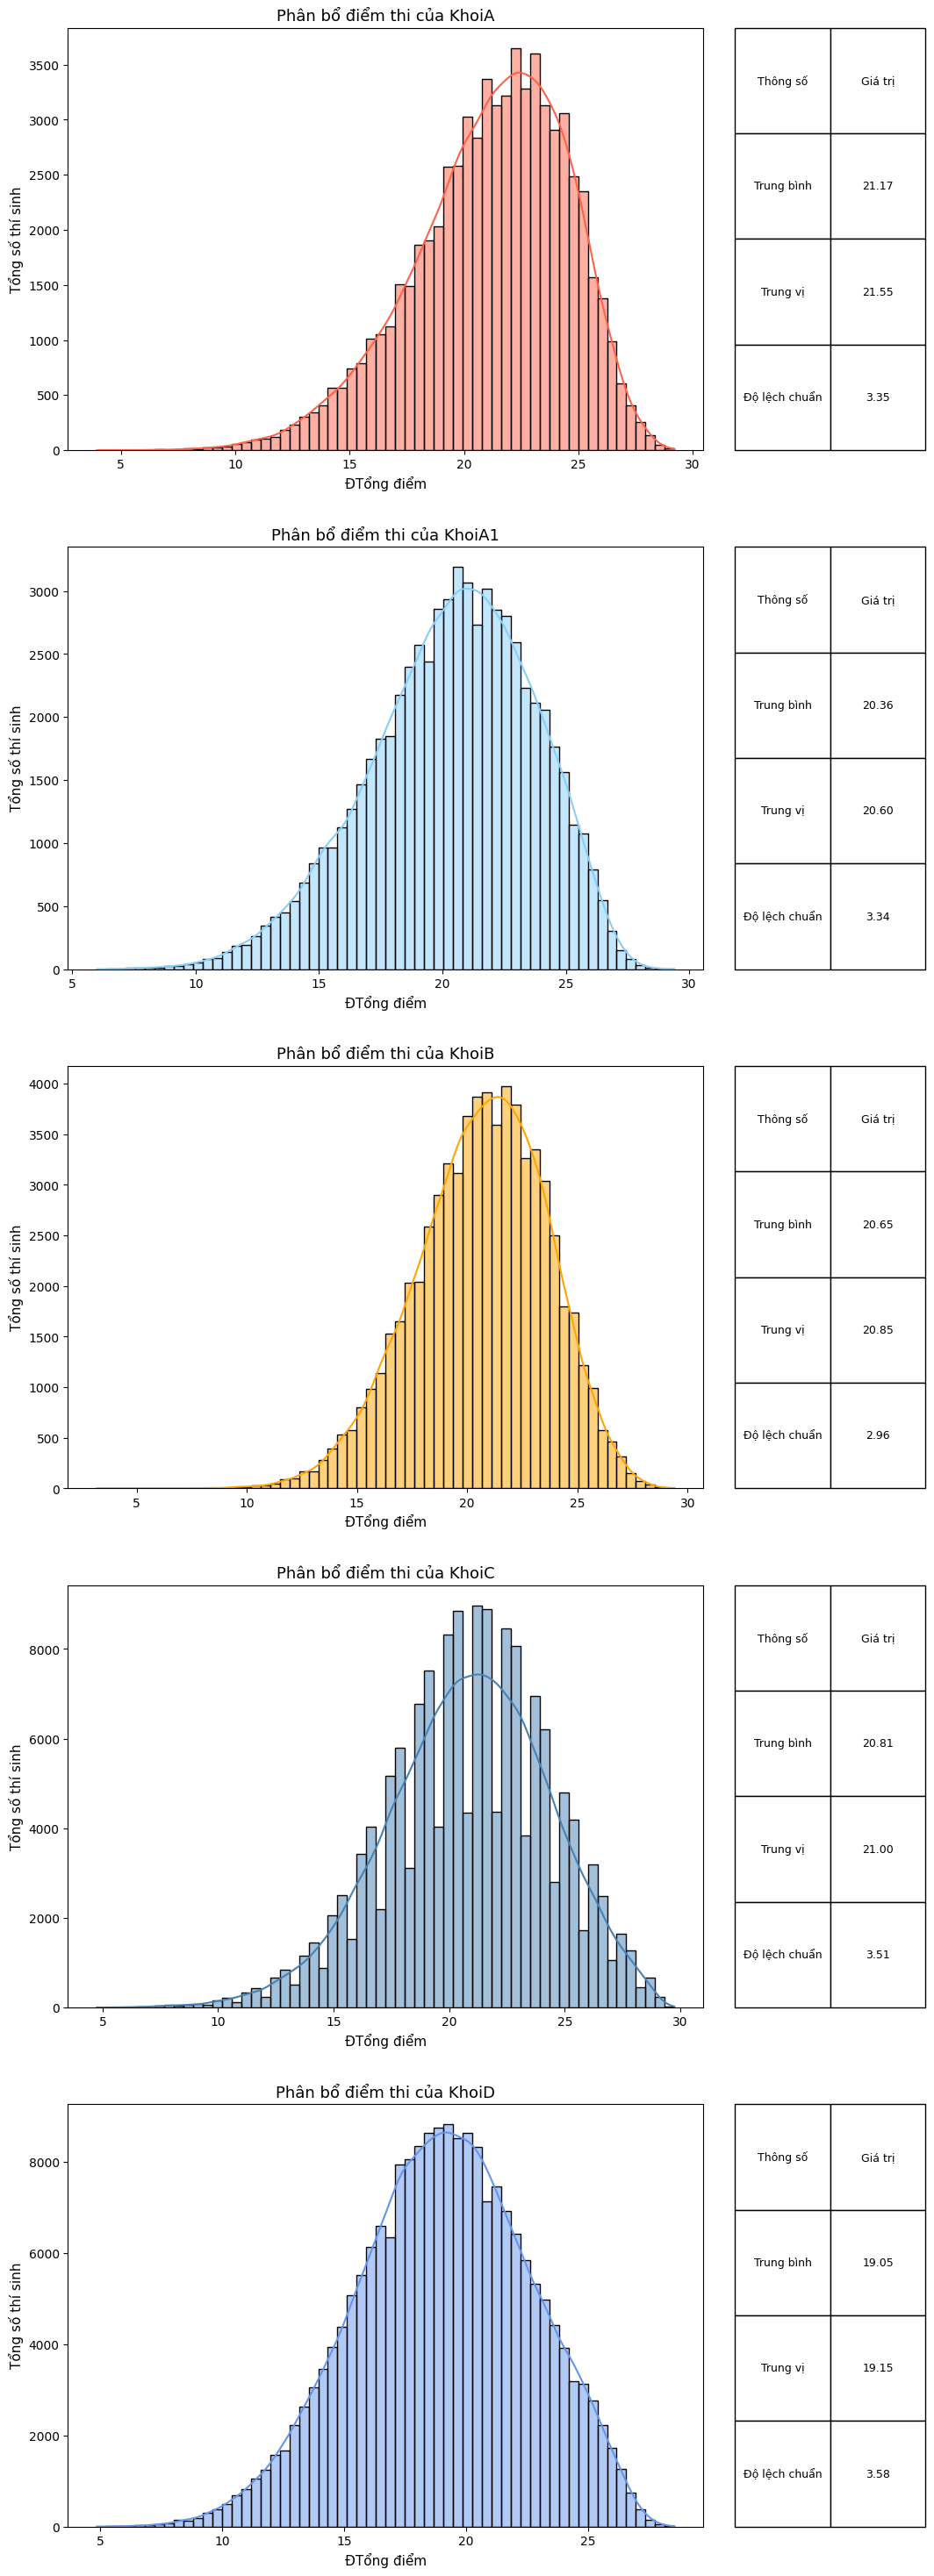

In [31]:
KhoiThi = df_khoi.columns

tiltes = ["Khối A", "Khối A1", "Khối B", "Khối C", "Khối D"]
colors = ["tomato", "lightskyblue", "orange", "steelblue", "cornflowerblue"]

# Vẽ histogram để thể hiện phân bổ điểm thi
plt.figure(figsize=(12, 30))
for i, (khoi, color) in enumerate(zip(KhoiThi, colors), 1):
    plt.subplot(len(KhoiThi), 1, i)
    sns.histplot(df_khoi[khoi], bins=60, kde=True, color=color, stat="count") 

    # Tính các thông số thống kê
    mean_k    = df_khoi[khoi].mean()
    median_k  = df_khoi[khoi].median()
    std_k     = df_khoi[khoi].std()

    # Tiêu đề cho nhãn và các trục
    plt.title(f"Phân bổ điểm thi của {khoi}", fontsize = 13)
    plt.xlabel("ĐTổng điểm", fontsize = 11)
    plt.ylabel("Tổng số thí sinh", fontsize = 11)

    # Hiển thị các thông tin thống kê trên biểu đồ
    textstr = [["Trung bình", f"{mean_k:.2f}"],
             ["Trung vị", f"{median_k:.2f}"],
             ["Độ lệch chuẩn", f"{std_k:.2f}"]]
    plt.table(cellText=textstr, colLabels=["Thông số", "Giá trị"], loc="right", cellLoc="center", bbox=[1.05, 0, 0.3, 1])

plt.tight_layout(pad=3.0)
plt.show()